In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import calplot
from datetime import datetime

In [5]:
# Reading Step count data from both mifit and google fit
StepCount = {}

# mifit data
with open("/home/mzfr/dev/year-in-review/fit/mifit/ACTIVITY/ACTIVITY_1605643103723.csv", "r") as f:
    data = csv.DictReader(f)
    for activity in data:
        date = datetime.strptime(activity["\ufeffdate"], "%Y-%m-%d")
        if date.year != 2020:
            continue
        StepCount[date] = int(activity["steps"])

# Google Fit data
with open("/home/mzfr/dev/year-in-review/fit/Fit/Daily Aggregations/Daily Summaries.csv", "r") as f:
    data = csv.DictReader(f)
    for summary in data:
        date = datetime.strptime(summary["Date"], "%Y-%m-%d")
        if date.year != 2020: # Keeping data just for 2020
            continue
        if date not in StepCount:
            try:
                StepCount[date] = int(summary["Step count"])
            except ValueError:
                print(date)

(<Figure size 900x122.4 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

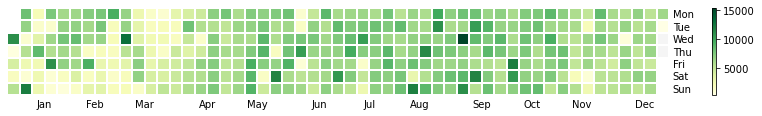

In [14]:
# Step Count

series = pd.Series(StepCount)
calplot.calplot(series, cmap='YlGn', edgecolor=None, yearlabels=False)

(<Figure size 900x122.4 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

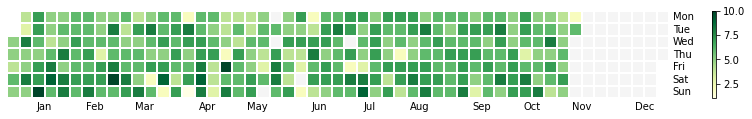

In [13]:
SleepTime = {}
## Sleep data from MiFit

with open("/home/mzfr/dev/year-in-review/fit/mifit/SLEEP/SLEEP_1605643104941.csv", "r") as f:
    data = csv.DictReader(f)
    for sleep in data:
        date = datetime.strptime(sleep["\ufeffdate"], "%Y-%m-%d")
        if date.year == 2020:
            start = datetime.fromtimestamp(int(sleep["start"]))
            stop = datetime.fromtimestamp(int(sleep["stop"]))
            total = stop-start
            SleepTime[date] = total.seconds//3600
        
Timeseries = pd.Series(SleepTime)
calplot.calplot(Timeseries, cmap='YlGn', edgecolor=None, yearlabels=False)